In [ ]:
import torch
from torch import nn  # nn contains basic building blocks of all neural network graphs (Tree graph)
import matplotlib.pyplot as plt

# Checking PyTorch version.
torch.__version__

'1.12.1+cu113'

## We now start implementation of our first machine learning algorithm in the PyTorch framework.

We are creating a simple linear regression algorithm (not neural network). And we optimize the parameters using normal gradient descent algorithm.


In [ ]:
# Known parameters. We want our model to calculate and get to this value for weights and biases.
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # X in machine learning is usually a tensor. It represents our features.
# unsqueeze(dim=1) adds an extra dimension so we have 1 more bracket in our tensor.
y = weight * X + bias # y contains our labels or data to be predicted.

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Now, we're going to update our parameters so that the function best represents our data. To do that, first we need to split up our dataset into a training and test set. (and a validation set if needed)

In [ ]:
train_split = int(0.8 * len(X)) # 80% data used for training set, 20% dataset used for testing.
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Now, let's create a function to visualize our data instead of it just being numbers on a page. To do that, we use pyplot.

In [ ]:
def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test,
                     predictions = None):
  
  # Plots training and test data and compares predictions.

  plt.figure(figsize=(10,7))  # Creates a new figure. figsize parameter takes width and height of figure in inches.

  # plt.scatter creates a scatter plot of y vs x. With varying marker size and/or color.
  # s represents the marker size. c represents the color of the marker.

  # Creating blue points for training data.
  plt.scatter(train_data, train_labels, s=4, c='b', marker='x', label="Training Data")

  # Creating green points for testing data. We can change the marker's shape also.
  plt.scatter(test_data, test_labels, s=4, c='g', marker='x', label="Testing Data")

  # Creating red points for our predicted data.
  if predictions is not None:
    # Plot the predictions if they exist.
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  plt.legend(prop={'size': 14});

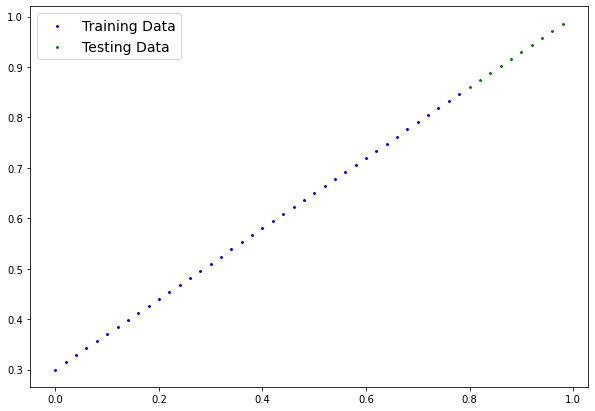

In [ ]:
plot_predictions();

##2. Building our model.

In [ ]:
# Create a linear regression model class.

# Almost everything in PyTorch inherits from nn.Module.
# Modules can also contain other modules so, you can nest them in a tree structure.
# Our class LinearRegressionModel inherits nn.Module class.
# We can name our class anything though. It's not like yahi hona chahiye bas.
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initialize model parameters. This step is also not necessary.
    self.weights = nn.Parameter(torch.randn(1,                      # Start with random weight. This will get adjusted as model learns.
                                            requires_grad = True,   # Can we update this value with gradient descent.
                                            dtype=torch.float))     # PyTorch loves float32 by default. 

    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad = True,
                                        dtype=torch.float))
    
  # Writing the function for forward propagation. When a value is passed through a neuron, what happens.
  # The node/neuron does mx + b, then uses the activation function.
  # Forward defines the computation made at every call.
  # Any subclass of nn.Module requires forward method to be overwritten.
  def forward(self, x: torch.Tensor) -> torch.Tensor:   # 'x' is expected to be of type torch.Tensor and the function outputs torch.Tensor.
    return self.weights * x + self.bias   # This is the linear regression formula (y = mx + b)


### PyTorch Model Building Essentials

* `torch.nn` - contains all the building blocks for computational graphs (neural networks)
* `torch.nn.Parameter` - what parameters should our model try and learn. Often, a pytorch layer from torch.nn will set this for us.
* `torch.nn.Module` - base class for all neural network modules. if you subclass it, you should override forward method.
* `torch.optim` - this is where the optimizers in pyTorch live. They help with gradient descent calculations.
* `def forward()` -  All nn.Module subclasses require you to override forward(). This method defines what happens in the forward computation.

### Checking the contents of our PyTorch model.

We can check our model parameters or what's inside our model using `.parameters()` function.

In [ ]:
torch.manual_seed(42) # Starts generating random numbers. Always generates .3367 first!
torch.randn(1)

tensor([0.3367])

In [ ]:
# Creating a random seed.
torch.manual_seed(42)

# Create an instance of our class.
model_0 = LinearRegressionModel()

# Checking out parameters.
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.3904], requires_grad=True)]

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how our model predicts 'y_test' compared to 'X_test'

`inference_mode()` is not required to make predictions. What inference mode does is that it stops tracking gradients for parameters which results in faster performance. So, when we're not training, we can use this method to improve performance.

`torch.inference_mode()` is `torch.no_grad()` on steroids. Basically both functions do the same thing but the first one is better.

In [ ]:
# With keyword ensures that program terminates properly if an exception is raised
with torch.inference_mode():
  y_preds = model_0(X_test) # Inference mode is a context manager that ensures that you are not keeping track of gradients during your operations.
  # This is true for testing.

# This was the older method for doing the above process but now torch.inference_mode() is more favoured.
# with torch.no_grad():
#   y_preds = model_0(X_test) 

y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

In [ ]:
y_pred = model_0(X_test)
# This does the same thing as the above function but, it keeps track of the gradient even during testing which is not required.
# Gradient is only needed to be tracked during the training phase.

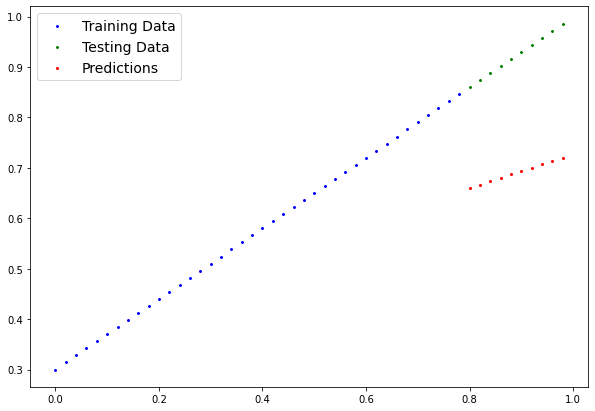

In [ ]:
# Plotting predictions made by our random parameters that we created. We will train our model to adjust these parameters.
plot_predictions(predictions=y_preds)

## 3. Training Model

The whole idea of training a model is to move from *unknown* random parameters to *known* parameters. Which basically represent the data in a better manner.

Our function should be able to predict the values such that the cost function gives us minimum value. To do that, we use gradient descent.

* **Loss Function** -  measures how poor our model's predictions are compared to the ideal values.

* **Optimizer** - Takes into account the value of our loss and then changes the values of our parameters such that we're minimizing the loss.
Inside the optimizer, you'll often have to set two values -
  1. `params` - the model parameters you'd like to optimize.
  2. `lr` - The learning rate. How fast or slow you want your parameter values to be updated.

Specifically for PyTorch, we need -
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [ ]:
# Check out our model's parameters in the form of an ordered dictionary.
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [ ]:
# Setup a loss function
lossFunc = nn.L1Loss()  # L1 Loss is mean absolute error. Difference ka absolute value leke, uska mean.

# Setup an optimizer (we're using stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01) # lr is learning rate.

## Building a training loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves moving data through our model's `forward()` function) to make predictions on data. This is also called forward propagation.
2. Calculate the loss (compare forward pass predictions to actual values)
3. Optimizer zero grad
4. Backward Propagation - move backwards through the network, adjusting our weights and biases by finding their gradients with respect to the loss function.
5. Gradient Descent - Use the optimizer to adjust the weights and biases such that it improves loss.

In [ ]:
list(model_0.parameters())  # This block shows our original random values of parameters.

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [ ]:
# Setting a manual seed to control the randomness of the program.
torch.manual_seed(42)

# An epoch is one loop through our data. This is a hyperparameter (because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data.
for epoch in range(epochs):
  # Set the model to training mode.
  model_0.train() # Train mode sets all parameters that require gradient to require gradient.

  # 1. Forward propagation
  y_pred = model_0(X_train)

  # 2. Calculate our loss
  loss = lossFunc(y_pred, y_train)  # Calculating the value of our loss function.
  # print(f'Loss: {loss}')
  # We take partial derivative of loss function wrt each parameter during backpropagation.

  # 3. Optimizer zero grad.
  optimizer.zero_grad() # This functions sets the gradwrients of all our parameters to be zero. Because they add up after each epoch, we set them to zero for fresh starts.

  # 4. Backpropagation
  loss.backward() # Backward function calculates the gradient descent for all the parameters of our model that have reqires_grad=True

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()  # Step function is basically updating our parameters based on the gradient descent we calculated.

  ### Testing
  model_0.eval()  # Turns off settings which we don't need during testing.
  with torch.inference_mode():  # Turns off gradient tracking. Inference mode is torch.no_grad() on steroids!
    # 1. Forward Pass
    test_pred = model_0(X_test)
    # 2. Loss Calculation
    test_loss = lossFunc(test_pred, y_test)

  # Print out what's happening
  if epoch%5 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')
    print(model_0.state_dict())
    print()


Epoch: 0 | Loss: 0.08169572055339813 | Test Loss: 0.22662055492401123
OrderedDict([('weights', tensor([0.3398])), ('bias', tensor([0.3939]))])

Epoch: 5 | Loss: 0.07310795783996582 | Test Loss: 0.2008223533630371
OrderedDict([('weights', tensor([0.3542])), ('bias', tensor([0.4069]))])

Epoch: 10 | Loss: 0.06808149069547653 | Test Loss: 0.1807345449924469
OrderedDict([('weights', tensor([0.3672])), ('bias', tensor([0.4154]))])

Epoch: 15 | Loss: 0.06489682197570801 | Test Loss: 0.1665084809064865
OrderedDict([('weights', tensor([0.3787])), ('bias', tensor([0.4194]))])

Epoch: 20 | Loss: 0.06258393079042435 | Test Loss: 0.15627031028270721
OrderedDict([('weights', tensor([0.3891])), ('bias', tensor([0.4204]))])

Epoch: 25 | Loss: 0.0605839304625988 | Test Loss: 0.14737029373645782
OrderedDict([('weights', tensor([0.3991])), ('bias', tensor([0.4204]))])

Epoch: 30 | Loss: 0.05879194289445877 | Test Loss: 0.1418602615594864
OrderedDict([('weights', tensor([0.4081])), ('bias', tensor([0.417

In [ ]:
model_0.state_dict()  # Parameters after 1 epoch

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

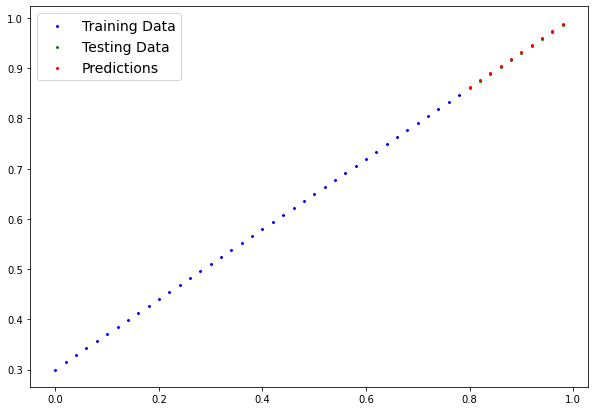

In [ ]:
with torch.inference_mode():
  finalPredictions = model_0(X_test)

plot_predictions(predictions=finalPredictions)

In [ ]:
torch.tensor(loss_values).numpy()

array([0.08169572, 0.07310796, 0.06808149, 0.06489682, 0.06258393,
       0.06058393, 0.05879194, 0.05704694, 0.05530194, 0.05355694,
       0.05182225, 0.05010534, 0.04838594, 0.04666654, 0.04494876,
       0.04323454, 0.04152032, 0.03980172, 0.03808232, 0.03636292,
       0.03464684, 0.03293261, 0.03121751, 0.02949809, 0.02777871,
       0.0260593 , 0.0243449 , 0.02263068, 0.0209139 , 0.01919449,
       0.01747509, 0.01575719, 0.01404297, 0.01232875, 0.01061027,
       0.00889087, 0.00717147, 0.00545526, 0.00374104, 0.00203175],
      dtype=float32)

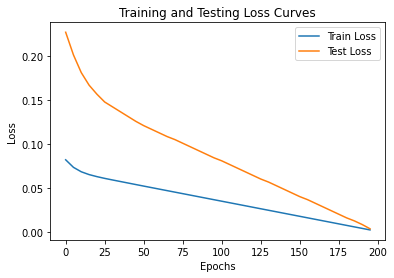

In [ ]:
# Plotting the loss curves.
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train Loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Test Loss")
plt.title("Training and Testing Loss Curves")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

# Saving and Loading Model Data

PyTorch uses the pickle module from python to save and load models. In pickle, we use the word serializing for saving and de-serializing for loading.

There are 3 main functions you need to know for saving and loading models in PyTorch:

1. `torch.save()` - allows you to save a PyTorch model in Python's pickle format.
2. `torch.load()` - allows you to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary.

In [ ]:
model_0.state_dict()  # PyTorch saves our model's important parameters in a dictionary.

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

There are 2 ways of saving/loading a model.
1. You can either save the state dict of the model.
2. You can save the entire model.

In [ ]:
# Saving our PyTorch model.
from pathlib import Path

# 1. Create our model directory.
MODEL_PATH = Path("models") # The folder we want to save our models to.
MODEL_PATH.mkdir(parents=True, exist_ok=True) # If it already exists, it won't throw us an error.

# 2. Create model save path.
MODEL_NAME = '01_simple_linear_regression.pt' # PyTorch models are usually saved with the extension .pt or .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH # This creates a path. This doesn't save the model.

# 3. Saving our model to the path generated.
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_simple_linear_regression.pt


In [ ]:
model_1 = LinearRegressionModel()
model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
model_1.eval()
model_1.state_dict()

OrderedDict([('weights', tensor([0.6962])), ('bias', tensor([0.3064]))])

In [ ]:
# Testing our loaded model's predictions.
with torch.inference_mode():
  modelPredictions = model_1(X_test)

modelPredictions == finalPredictions  # Comparing if both our models are predicting the same values.


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Revising everything and going back through all the steps above in one place.

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# Checking pytorch version
torch.__version__

'1.12.1+cu113'

Create device-agnostic code. Utilizing a gpu if it's available. This will improve performance drastically.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cpu


### 6.1 Data 

In [ ]:
weight = 0.7
bias = 0.3

# Create range values 
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias

In [ ]:
# Splitting the data
split_ratio = int(0.8 * len(X))
X_train, X_test = X[:split_ratio], X[split_ratio:]
y_train, y_test = y[:split_ratio], y[split_ratio:]

In [ ]:
def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test,
                     predictions = None):
  
  # Plots training and test data and compares predictions.

  plt.figure(figsize=(10,7))  # Creates a new figure. figsize parameter takes width and height of figure in inches.

  # plt.scatter creates a scatter plot of y vs x. With varying marker size and/or color.
  # s represents the marker size. c represents the color of the marker.

  # Creating blue points for training data.
  plt.scatter(train_data, train_labels, s=4, c='b', marker='x', label="Training Data")

  # Creating green points for testing data. We can change the marker's shape also.
  plt.scatter(test_data, test_labels, s=4, c='g', marker='x', label="Testing Data")

  # Creating red points for our predicted data.
  if predictions is not None:
    # Plot the predictions if they exist.
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  plt.legend(prop={'size': 14});

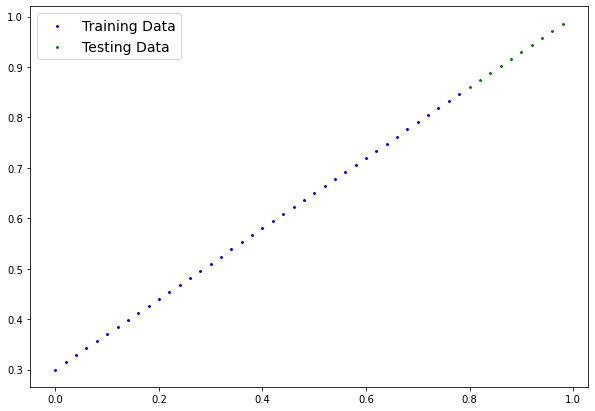

In [ ]:
# Plot the data -
plot_predictions()

### 6.2 Creating Model

In [ ]:
class LinearRegression(nn.Module):

  def __init__(self):
    super().__init__()

    # self.weights = nn.Parameter(torch.randn(1),
    #                             requires_grad=True)
    
    # self.bias = nn.Parameter(torch.randn(1),
    #                          requires_grad=True)

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1,
                                  bias=True)
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # return self.weights * x + self.bias
    return self.linear_layer(x) # Calling the layer in our forward method.

In [ ]:
torch.manual_seed(42)
finalModel = LinearRegression() # Creating an instance of our class.
finalModel.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### 6.3 Checking if our model predicts values and plotting those.

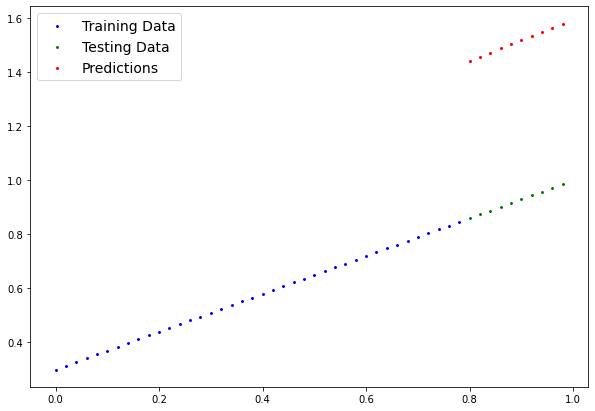

In [ ]:
with torch.inference_mode():
  preds = finalModel(X_test)

finalModel.eval()
plot_predictions(predictions=preds)

###6.4 Training Our Model

In [ ]:
loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(finalModel.parameters(), lr=0.015)

In [ ]:
epochs = 500

for epoch in range(epochs):

  finalModel.train()  # Go to training mode.

  preds = finalModel(X_train) # Forward Propagation

  lossValue = loss_function(preds, y_train)  # Calculating the loss.

  optimizer.zero_grad() # Setting gradients to zero.

  lossValue.backward() # Backpropagation. Calculate derivative wrt loss.
  
  optimizer.step() # Optimizing values.

In [ ]:
finalModel.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6926]])),
             ('linear_layer.bias', tensor([0.3133]))])

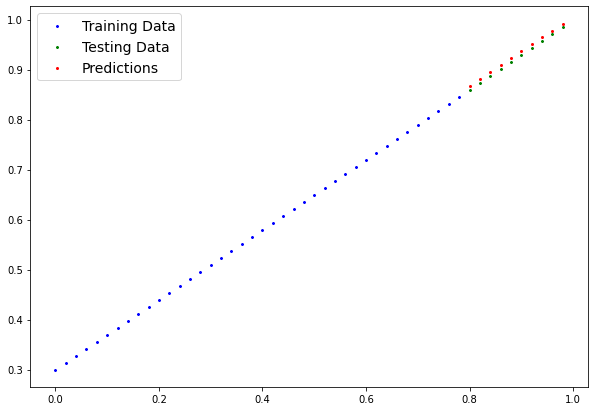

In [ ]:
finalModel.eval()
with torch.inference_mode():
  predTest = finalModel(X_test)

plot_predictions(predictions=predTest)